# Predicting heart disease using machine learning

This notebook looks into using various Python-based ML and data science lib in an attempt to build ML model capable of predicitng whether someone has heart disease based on their medical attributes

1. Problem defintion
2. Data
3. Evaluation
4. Features
5. Modeling

## 1. Probelem definition

In a statement,
> Given clinical parameter about a patient, can we predict whether or not they have heart disease

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
If we can reach 85% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in the data.

Clean, properly indented, numbered outer list with bullets inside — like the picture:

1. age – age in years

2. sex – gender

    * 1 = male

    * 0 = female

3. cp – chest pain type

    * 0: Typical angina — decreased blood supply to heart

    * 1: Atypical angina — not heart-related

    * 2: Non-anginal pain — usually esophageal/other

    * 3: Asymptomatic — no disease symptoms

4. trestbps – resting blood pressure (mm Hg)

    * Above 130–140 is concerning

5. chol – serum cholesterol (mg/dL)

    * Serum = LDL + HDL + 0.2 × triglycerides

    * Above 200 is concerning

6. fbs –  (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

     * '> 126' mg/dL suggests diabetes

8. restecg – resting ECG results

   * 0: Normal

   * 1: ST-T abnormality (mild → severe, abnormal rhythm)

   * 2: Left ventricular hypertrophy (enlarged pumping chamber)

9. thalach – maximum heart rate achieved

10. exang – exercise-induced angina

    * 1 = yes

    * 0 = no

11. oldpeak – ST depression vs rest

    * Higher = more stress = worse heart condition
      
12. slope – peak exercise ST segment slope

    * 0: Upsloping — better with exercise (rare)

    * 1: Flat — typical healthy

    * 2: Downsloping — unhealthy sign


13. ca – number of major vessels (0–3) colored by fluoroscopy

    * Colored vessel = visible blood flow

    * More vessels = better circulation

14. thal – thallium stress result

    * 1, 3: Normal

    * 6: Fixed defect — past issue but okay now

    * 7: Reversible defect — poor blood movement during exercise

14. target – disease status

    * 1 = has disease

    * 0 = no disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
import joblib

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape 

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

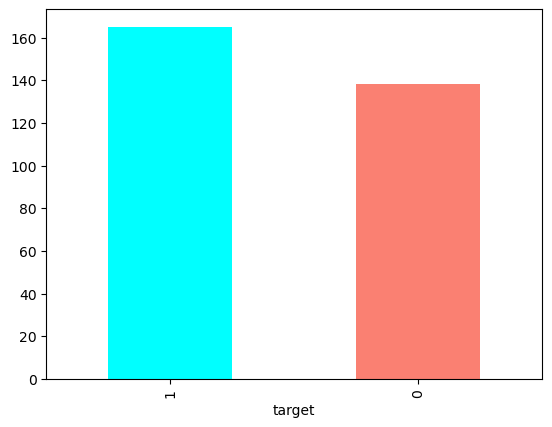

In [5]:
df["target"].value_counts().plot(kind = "bar" , color = ["cyan" , "salmon"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


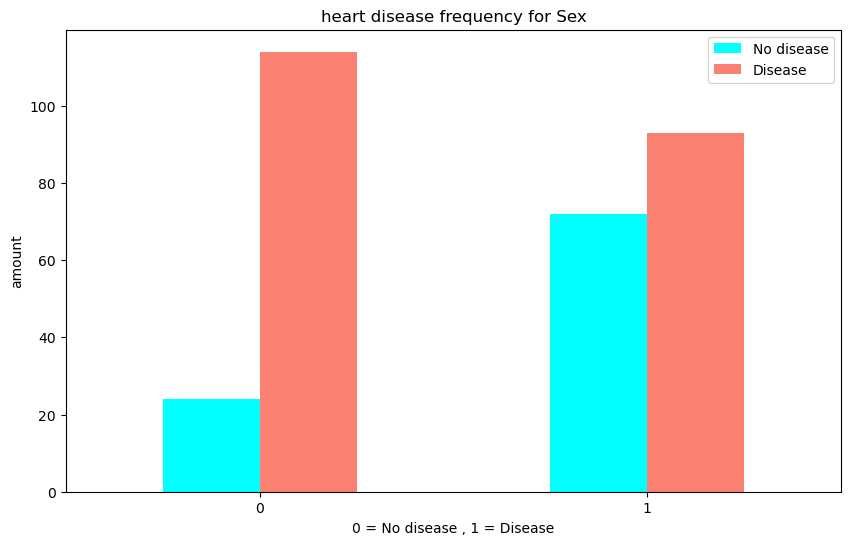

In [11]:
pd.crosstab(df["target"],df["sex"]).plot(kind  = "bar" ,figsize = [10,6], color = ["cyan","salmon"])

plt.title("heart disease frequency for Sex")
plt.xlabel("0 = No disease , 1 = Disease")
plt.ylabel("amount")
plt.legend (["No disease"  , "Disease"])
plt.xticks(rotation=0);

## Age vs Max heart rate for Heart Disease

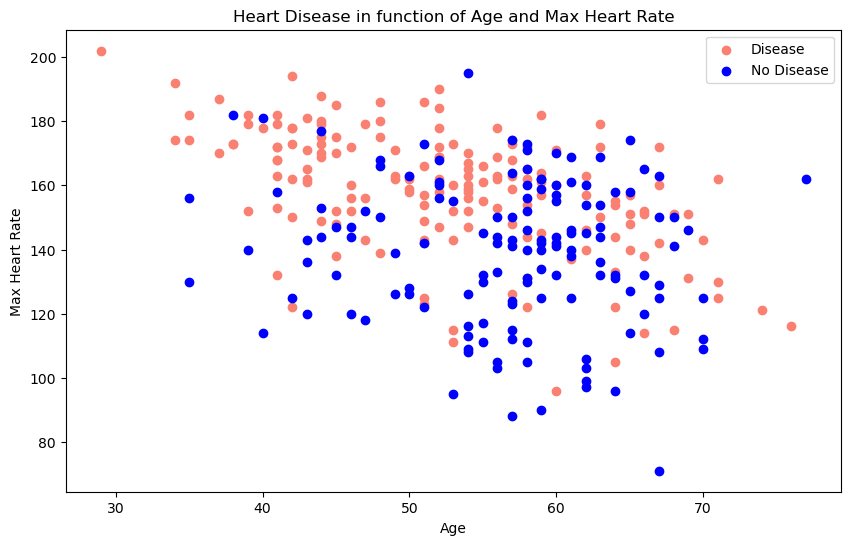

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

#add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

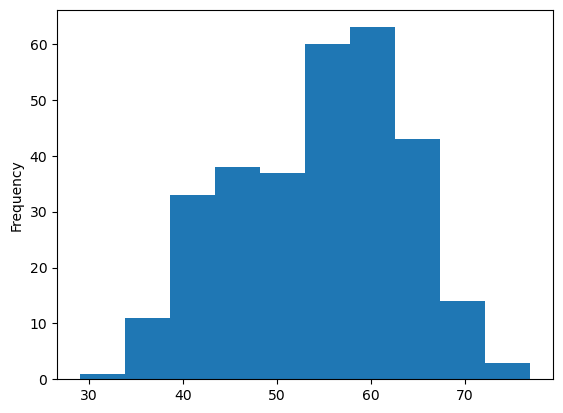

In [13]:
#Distibution of the age with a histogram
df.age.plot.hist();


### Heart Disease Frequency per Chest Pain Type
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df["cp"] , df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

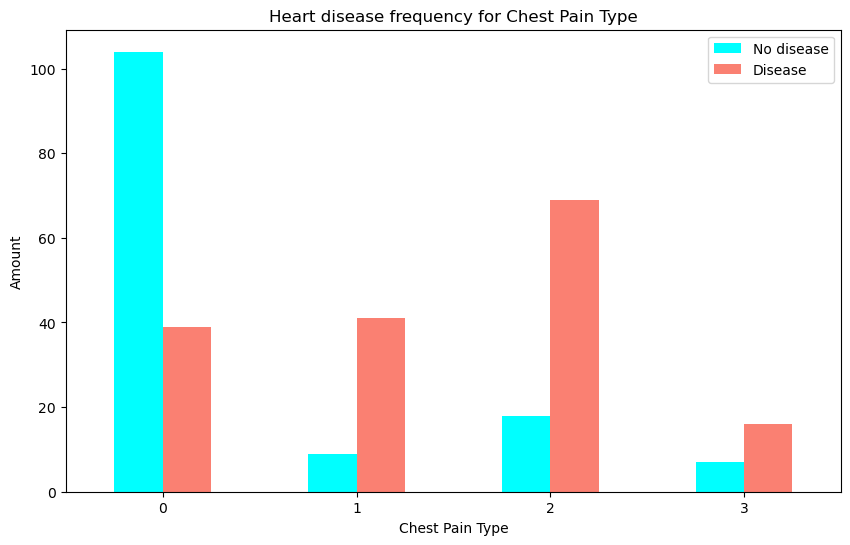

In [15]:
pd.crosstab(df["cp"], df["target"]).plot( kind = "bar" ,  figsize = [10,6] , color= ["cyan","salmon"])

plt.title("Heart disease frequency for Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend (["No disease"  , "Disease"])
plt.xticks(rotation = 0)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


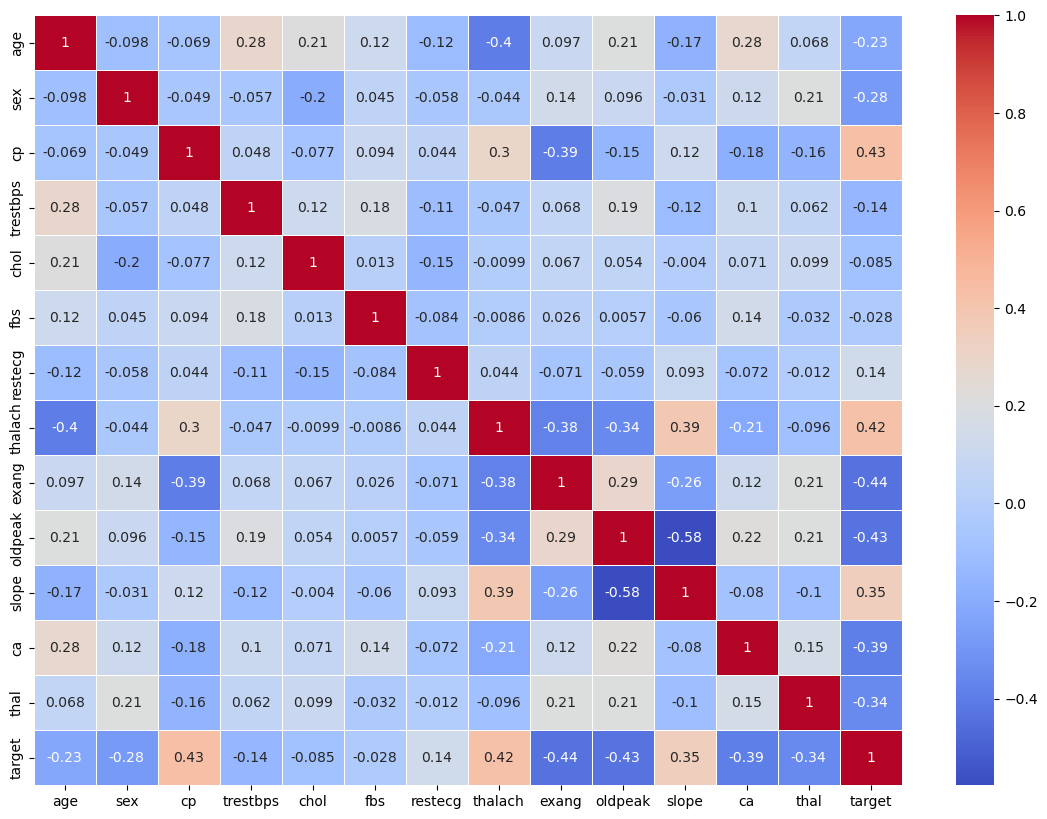

In [18]:
corr = df.corr()
plt.figure(figsize=(14,10)) 
sns.heatmap(corr, annot=True, linewidth = 0.5,  cmap="coolwarm")
plt.show()

#In case  bootm and top row look clipped:

#ax = sns.heatmap(corr, annot=True, linewidth = 0.5,  cmap="coolwarm")
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)


## 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = df.drop(["target"], axis = 1)
y = df["target"]

In [21]:
print(X)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [22]:
np.random.seed(42)

X_train, X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)
print(X_train, y_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0    

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

Logistic Regression
K-Nearest Neighbours Classifier
Random Forest Classifier

In [23]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
def f_n_s(models, X_train ,X_test ,y_train ,y_test):
    np.random.seed(42)
    model_score = {}

    for name , model in models.items():
        model.fit(X_train,y_train)
        #Evaluate the model and add its score to dictionary
        
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [24]:
model_scores = f_n_s(models =models, X_train = X_train ,X_test = X_test ,y_train = y_train ,y_test = y_test)
model_scores

C:\Users\San Anshuk\Desktop\sample_project_01\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

<Axes: >

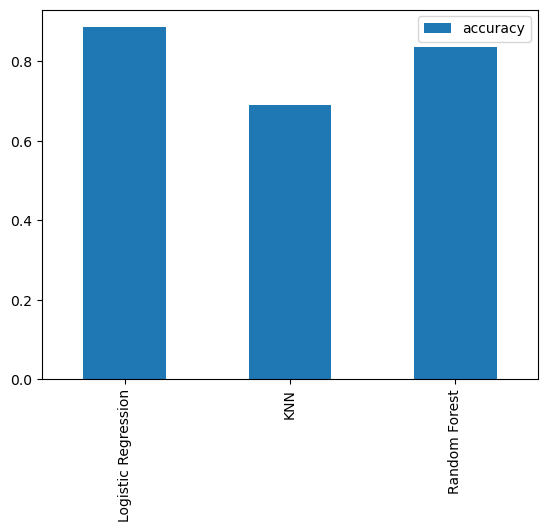

In [25]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.

Let's look at the following:

 * Hypyterparameter tuning
 * Feature importance
 * Confusion matrix
 * Cross-validation
 * Precision
 * Recall
 * F1 score
 * Classification report
 * ROC curve
 * Area under the curve (AUC)

## 6. Hyperparameter tuning and cross-validation

### KNN Tuning by hands

In [26]:
train_score= []
test_score= []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
train_score 


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


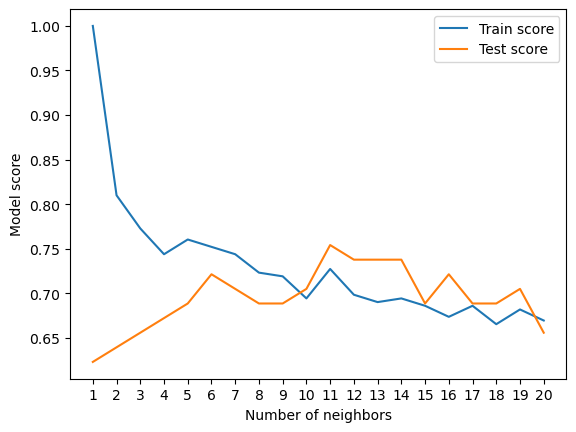

In [28]:
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

we are going to tune:

* LogisticRegression()
* RandomForestCLassifier()
  
....using RandomizedSearchCV

In [29]:
# Hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [30]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [32]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [33]:
# Tune RandomForestClassifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv =5 , n_iter = 20 , verbose = True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [34]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [35]:
rs_rf.score(X_test ,y_test)

0.8688524590163934

### Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [36]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}
gs_log_rg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_rg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [37]:
gs_log_rg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [38]:
gs_log_rg.score(X_test,y_test)

0.8852459016393442

## 7. Evaluting our tuned machine learning classifier, beyond accuracy
* ROC and AUC Score
* COnfusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

In [39]:
 y_preds = gs_log_rg.predict(X_test)

In [40]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [41]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

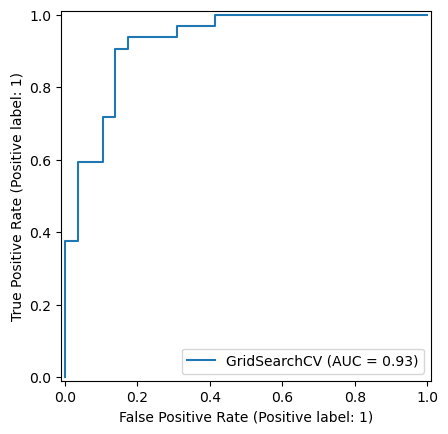

In [42]:
#ROC curve and AUC metric
RocCurveDisplay.from_estimator(
    gs_log_rg,
     
    X_test,
    y_test
)

In [43]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

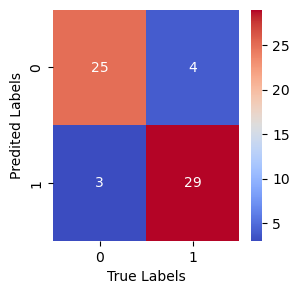

In [44]:
def  plot_conf_mat(y_test,y_preds):
    plt.figure(figsize=(3,3))
    corr = confusion_matrix(y_test, y_preds)
    sns.heatmap(corr , annot = True , cmap= "coolwarm")
    plt.xlabel("True Labels")
    plt.ylabel("Predited Labels")
plot_conf_mat(y_test,y_preds)

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [46]:
gs_log_rg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [47]:

clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")
clf.fit(X_train, y_train)

cv_acc_score = cross_val_score( clf, X, y , cv = 5, scoring = "accuracy")
cv_acc_score

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [48]:
cv_acc = np.mean(cv_acc_score)
cv_acc

np.float64(0.8479781420765027)

In [49]:
cv_prec_score = cross_val_score( clf, X, y , cv = 5, scoring = "precision")
cv_prec_score = np.mean(cv_prec_score)
cv_prec_score

np.float64(0.8215873015873015)

In [50]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [51]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

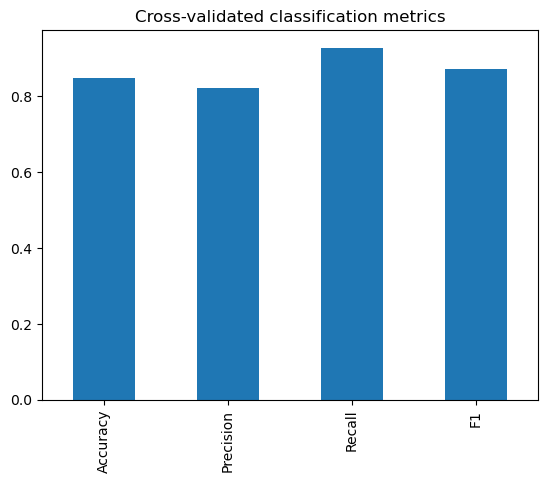

In [52]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec_score,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## 8. Feature importance

In [54]:
clf.fit(X_train, y_train);
importance = pd.Series(
    # clf.feature_importances_, this is only  for RandomForest, Gradient Boosting, XGBoost  , DecisionTree

    clf.coef_[0], # this is for Logistic regresion
    index=X.columns
) # . sort_values(ascending=False) for sorting them into ascending
importance.head(10)

age         0.003699
sex        -0.904241
cp          0.674728
trestbps   -0.011613
chol       -0.001704
fbs         0.047877
restecg     0.334902
thalach     0.024729
exang      -0.631204
oldpeak    -0.575910
dtype: float64

In [55]:
feature_dict = dict(zip(X.columns , clf.coef_[0]))
feature_dict

{'age': np.float64(0.003699223396114675),
 'sex': np.float64(-0.9042409779785583),
 'cp': np.float64(0.6747282348693419),
 'trestbps': np.float64(-0.011613398123390507),
 'chol': np.float64(-0.0017036431858934173),
 'fbs': np.float64(0.0478768694057663),
 'restecg': np.float64(0.33490207838133623),
 'thalach': np.float64(0.024729380915946855),
 'exang': np.float64(-0.6312041363430085),
 'oldpeak': np.float64(-0.5759099636629296),
 'slope': np.float64(0.47095166489539353),
 'ca': np.float64(-0.6516534354909507),
 'thal': np.float64(-0.6998421698316164)}

In [56]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003699,-0.904241,0.674728,-0.011613,-0.001704,0.047877,0.334902,0.024729,-0.631204,-0.57591,0.470952,-0.651653,-0.699842


<Axes: title={'center': 'Feature Importance'}>

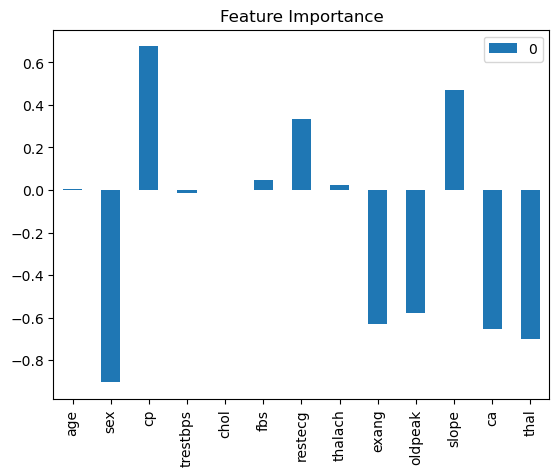

In [57]:
feature_df.T.plot.bar(title  = "Feature Importance")

## 9. Prediction Function

In [86]:
def predict_heart_disease(input_data):
    input_df = pd.DataFrame([input_data], columns = X.columns)
    prediction = clf.predict(input_df)[0]
    probability = clf.predict_proba(input_df)[0][1]

    if prediction == 1:
        result = "Heart disease predicted"
    else:
        result = "No heart disease predicted"

    confidence = f"{probability*100:.0f}% confidence"
        
    return result, confidence

## 10. Saving the model

In [95]:
joblib.dump(clf,"heart_disease_model.joblib")

['heart_disease_model.joblib']

In [92]:
#Loading the model
loaded_model = joblib.load("heart_disease_model.joblib")

In [93]:
#Optional quick check
loaded_model.predict(X_test[:1])

array([0])

In [94]:
sample_input = {
    "age": 57,
    "sex": 1,
    "cp": 3,
    "trestbps": 130,
    "chol": 236,
    "fbs": 0,
    "restecg": 0,
    "thalach": 174,
    "exang": 0,
    "oldpeak": 0.0,
    "slope": 1,
    "ca": 0,
    "thal": 2
}

predict_heart_disease(sample_input)


('Heart disease predicted', '95% confidence')